# Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans


pandas to manipulate data

matplotlib and seaborn for fast visualizations

sklearn for machine learning models

# Importing and Exploring Data

In [2]:
dataset=pd.read_csv("iris-dataset.csv")
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
dataset.tail()

,sepal_length,sepal_width,petal_length,petal_width
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [4]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [6]:
dataset.shape

(150, 4)

In [7]:
x=dataset[:]

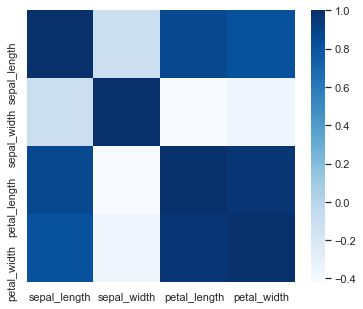

In [8]:
corr=dataset.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr,cmap="Blues")

The Given Dataset has 150 records


The number of features or independent variable is four

The Dataset has no missing values 

# K-Means Clustering Model

# Standardizing The Variables

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)


In [10]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss

[600.0,
 223.73200573676345,
 140.96581663074699,
 114.42970777082235,
 91.14860119459556,
 80.23060704506958,
 70.93964372756813,
 62.967584883250325,
 55.70641053075772]

The Elbow Method

This method is most useful in determining the optimum number of clusters

Text(0, 0.5, 'Within-cluster Sum of Squares')

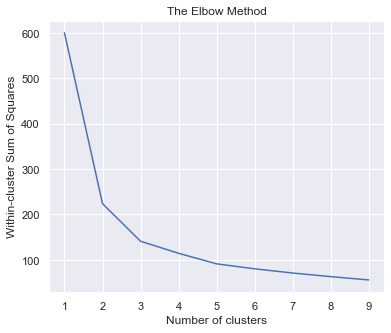

In [11]:
number_clusters = range(1,10)
plt.figure(figsize=(6,5))
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

Optimum number of  Cluster 3

In [12]:
kmeans=KMeans(n_clusters=3,init="k-means++",random_state=0)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [13]:
clusters=kmeans.fit_predict(x)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [14]:
df=dataset.copy()
df["Cluster ID"]=clusters
df

,sepal_length,sepal_width,petal_length,petal_width,Cluster ID
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


# Visualizing The Clusters

Text(0.5, 1.0, 'Clustering on basis of Petal Features')

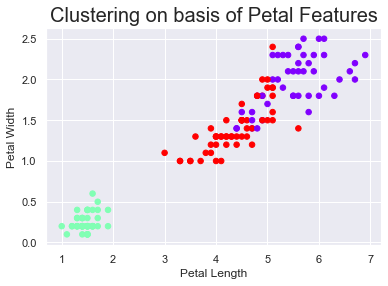

In [15]:

plt.scatter(x=df["petal_length"],y=df["petal_width"],cmap="rainbow",c=df["Cluster ID"],s=30)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Clustering on basis of Petal Features",size=20)

Text(0.5, 1.0, 'Clustering on basis of Sepal Features')

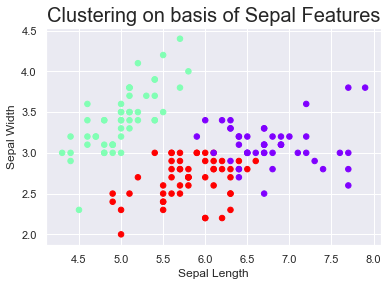

In [16]:
plt.scatter(x=df["sepal_length"],y=df["sepal_width"],cmap="rainbow",c=df["Cluster ID"],s=30)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Clustering on basis of Sepal Features",size=20)

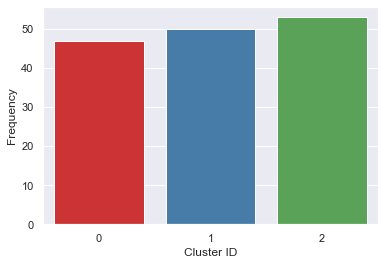

In [17]:
sns.countplot(df["Cluster ID"],palette="Set1")
plt.ylabel("Frequency")
plt.show()

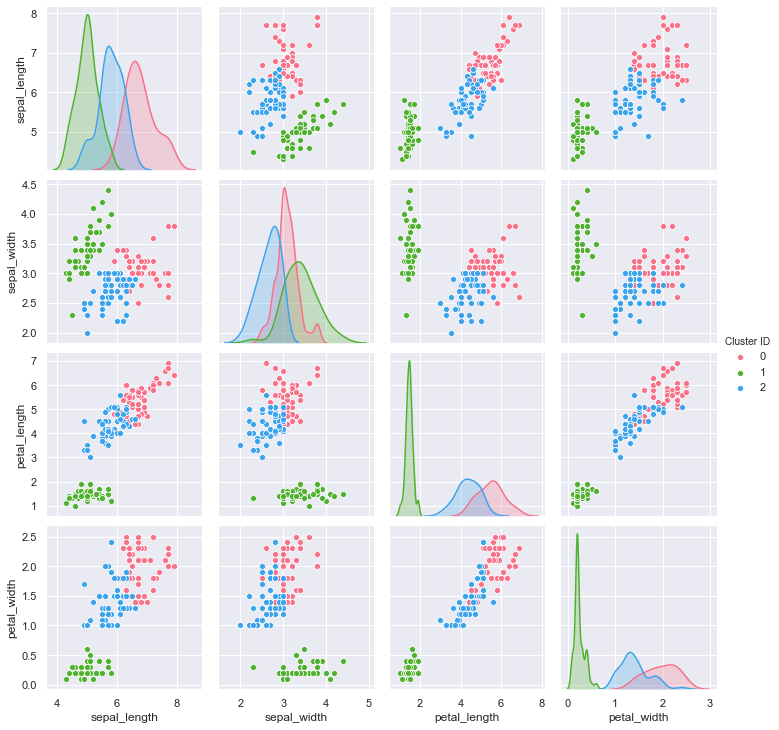

In [18]:
sns.pairplot(df,hue="Cluster ID",palette="husl")